**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage", 
    "*",
    "fcc_starrmpracrispri_vote2",
    "summary"
)
txt_fname = "region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_umap_cluster_by_coverage/fcc_astarr_macs_input_overlap/fcc_starrmpracrispri_vote2/summary/region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_umap_cluster_by_coverage/fcc_astarr_macs_input_union/fcc_starrmpracrispri_vote2/summary/region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv 


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "*",
    "summary"
)
txt_fname = "region.annotation.fcc_starrmpra_junke.group.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_starrmpra_junke.group.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.fcc_starrmpra_junke.group.tsv 


## Import data

**Import region pairs**

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "analysis_umap_cluster_by_coverage", 
        txt_folder,
        "fcc_starrmpracrispri_vote2",
        "summary"
    )
    txt_fname = "region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_umap_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 33953     6

$fcc_astarr_macs_input_union
[1] 39788     6



Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031


In [6]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    txt_fname = "region.annotation.fcc_starrmpra_junke.group.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150047      5

$fcc_astarr_macs_input_union
[1] 246862      5



Chrom,ChromStart,ChromEnd,Region,Group
chr1,10038,10405,chr1:10038-10405,Distal:Inactive
chr1,14282,14614,chr1:14282-14614,Distal:Inactive
chr1,16025,16338,chr1:16025-16338,Distal:Inactive


## Arrange table

In [7]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get tables
    dat_region_umap  = lst_dat_region_umap_import[[txt_folder]]
    dat_region_annot = lst_dat_region_annot_import[[txt_folder]]
    
    ### join tables
    dat = dplyr::left_join(
        dat_region_umap,
        dat_region_annot,
        by = c("Chrom", "ChromStart", "ChromEnd", "Region")
    )
    return(dat)
})

### assign and show
lst_dat_region_merge = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 33958     7

$fcc_astarr_macs_input_union
[1] 39798     7



Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2,Group
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927,Proximal:Active
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063,Proximal:Active
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031,Proximal:Inactive


## Explore: UMAP labeled with annotation

In [8]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_umap_import
dat = lst[[idx]]

dat_region_umap = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 33953     6


Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031
chr1,100265562,100266994,chr1:100265562-100266994,7.761321,5.706240
chr1,10032429,10033763,chr1:10032429-10033763,9.426987,4.859900
chr1,100351018,100353268,chr1:100351018-100353268,7.974018,5.128401


In [9]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_merge
dat = lst[[idx]]

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 33958     7


Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2,Group
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927,Proximal:Active
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063,Proximal:Active
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031,Proximal:Inactive
chr1,100265562,100266994,chr1:100265562-100266994,7.761321,5.706240,Proximal:Active
chr1,10032429,10033763,chr1:10032429-10033763,9.426987,4.859900,Proximal:Active
chr1,100351018,100353268,chr1:100351018-100353268,7.974018,5.128401,Proximal:Inactive


### Set plot style

In [10]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16),
    strip.text   = element_text(size = 16)
)

```
### set color
dat = tribble(
    ~Group,                ~Color,
    "Proximal:Active",     "#e41a1c",
    "Distal:Active",       "#ff7f00",
    "Distal:Repressive",   "#377eb8",
    "Proximal:Repressive", "#f781bf"
)
dat_annot_color = dat
lst_txt_color = split(dat$Color, dat$Group)
```

In [11]:
dat = tribble(
    ~Group,                 ~Color,
    "Proximal:Active",      "#e41a1c", 
    "Distal:Active",        "#ff7f00",
    "Distal:Repressive",    "#377eb8",
    "Proximal:Repressive",  "#4daf4a", #"#f781bf",
    "Distal:Inactive",      "#bdbdbd",
    "Proximal:Inactive",    "#252525"
)
dat_annot_color = dat
lst_txt_color = split(dat$Color, dat$Group)

### Plot each label separately

**Proximal:Active**

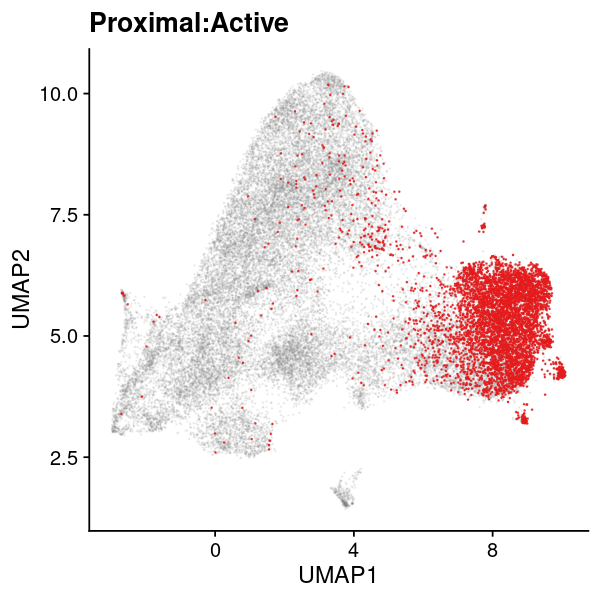

In [12]:
### init
idx = "Proximal:Active"

### get tables
dat = dat_region_merge
lst = split(dat, dat$Group)
tmp = lst[[idx]]

dat = dat_region_umap
txt_color = lst_txt_color[[idx]]
txt_title = idx

### generate plot
gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey50",  size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color=txt_color, size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = txt_title)

### assign and show
gpt_export_proximal_active = gpt
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

**Distal:Active**

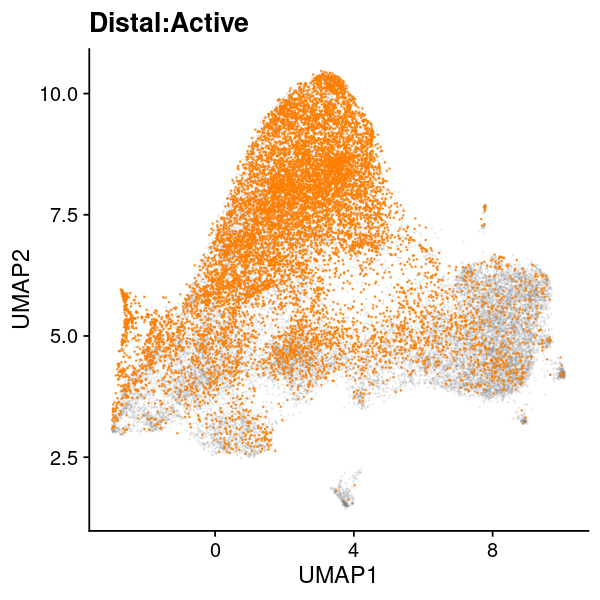

In [13]:
### init
idx = "Distal:Active"

### get tables
dat = dat_region_merge
lst = split(dat, dat$Group)
tmp = lst[[idx]]

dat = dat_region_umap
txt_color = lst_txt_color[[idx]]
txt_title = idx

### generate plot
gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey50",  size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color=txt_color, size = 0.1, alpha = 0.7) +
    theme_cowplot() +
    labs(title = txt_title)

### assign and show
gpt_export_distal_active = gpt
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

**Distal:Repressive**

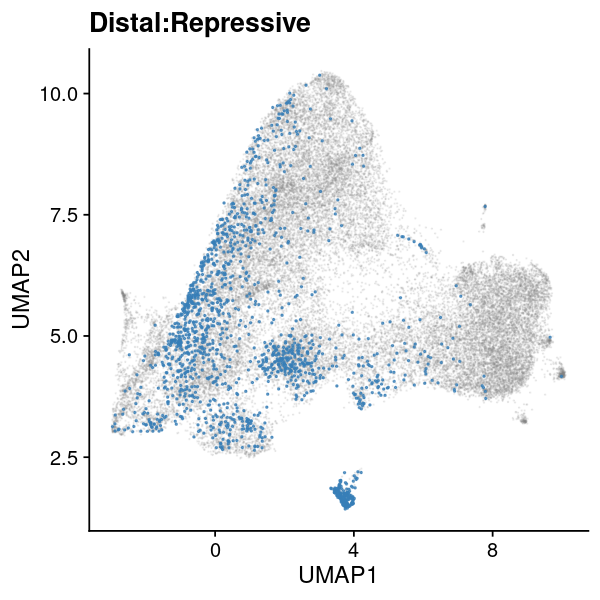

In [14]:
### init
idx = "Distal:Repressive"

### get tables
dat = dat_region_merge
lst = split(dat, dat$Group)
tmp = lst[[idx]]

dat = dat_region_umap
txt_color = lst_txt_color[[idx]]
txt_title = idx

### generate plot
gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey50",  size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color=txt_color, size = 0.3, alpha = 0.7) +
    theme_cowplot() +
    labs(title = txt_title)

### assign and show
gpt_export_distal_repressive = gpt
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

**Proximal:Repressive**

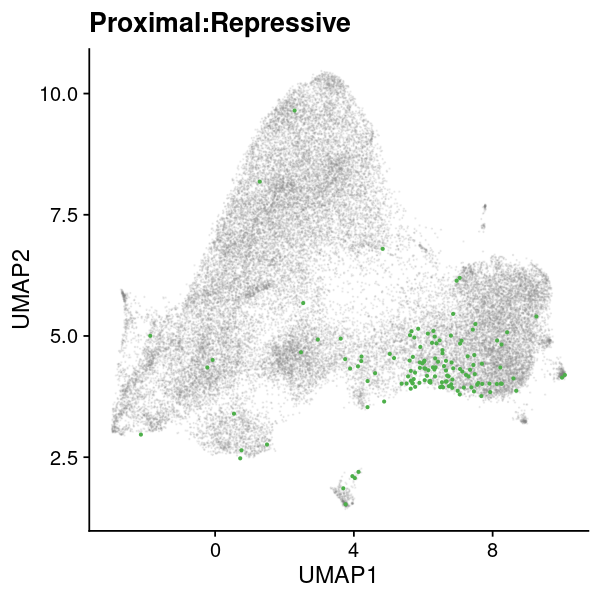

In [15]:
### init
idx = "Proximal:Repressive"

### get tables
dat = dat_region_merge
lst = split(dat, dat$Group)
tmp = lst[[idx]]

dat = dat_region_umap
txt_color = lst_txt_color[[idx]]
txt_title = idx

### generate plot
gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey50",  size = 0.1, alpha = 0.1) + 
    geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color=txt_color, size = 0.5, alpha = 1.0) +
    theme_cowplot() +
    labs(title = txt_title)

### assign and show
gpt_export_proximal_repressive = gpt
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

**Concatenate the plots**

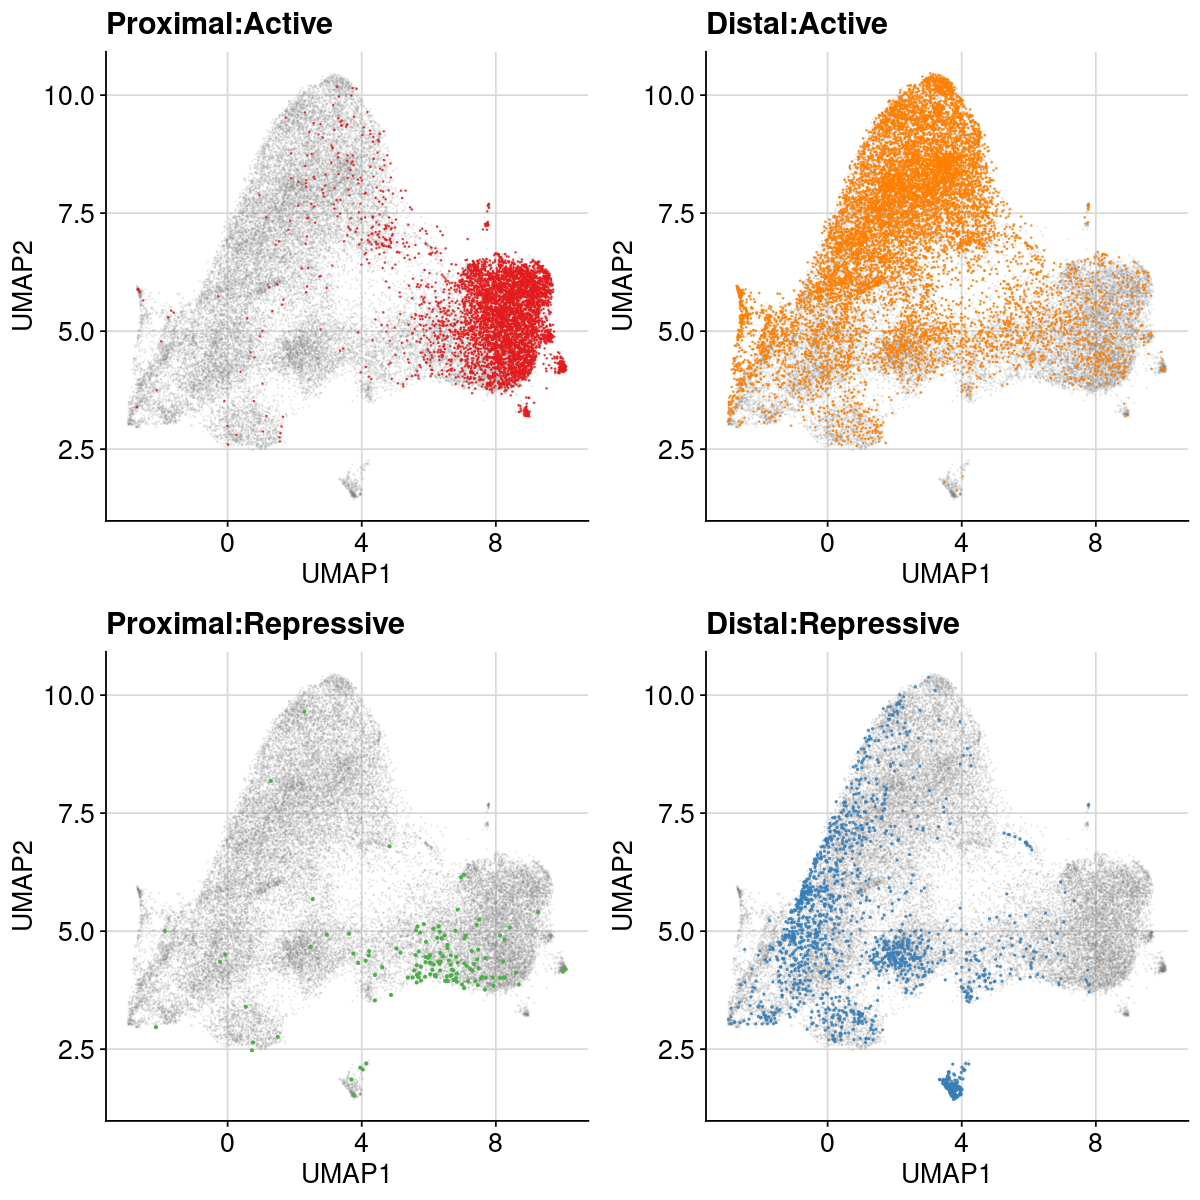

In [16]:
### concat
lst = list(
    gpt_export_proximal_active,
    gpt_export_distal_active,
    gpt_export_proximal_repressive,
    gpt_export_distal_repressive
)

### generate plot
lst = lapply(lst, function(gpt){
    gpt = gpt + theme_text + background_grid()
    return(gpt)
})
plt = plot_grid(plotlist = lst, nrow = 2)

### assign and show
plt_export_fcc_group_concat = plt
options(repr.plot.height = 10, repr.plot.width = 10)
print(plt)

**Save plot**

In [17]:
plt_export = plt_export_fcc_group_concat
txt_export = "fig.region_umap.astarr_input_overlap.fcc_starrmpracrispr_vote2.scatterplot.label_starrmpra_vote2.concat"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 10, width = 10, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 10, width = 10, units = "in")

### Merge into one plot

```
gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey70",  size = 0.1, alpha = 0.1) + 
    geom_point(data = lst[[vec[4]]], aes(x=UMAP1, y=UMAP2), color=lst_txt_color[[vec[4]]], size = 0.1, alpha = 0.6) +
    geom_point(data = lst[[vec[3]]], aes(x=UMAP1, y=UMAP2), color=lst_txt_color[[vec[3]]], size = 0.1, alpha = 0.6) +
    geom_point(data = lst[[vec[2]]], aes(x=UMAP1, y=UMAP2), color=lst_txt_color[[vec[2]]], size = 0.3, alpha = 0.7) +
    geom_point(data = lst[[vec[1]]], aes(x=UMAP1, y=UMAP2), color=lst_txt_color[[vec[1]]], size = 0.6, alpha = 1.0) +
    theme_cowplot() +
    background_grid()
```

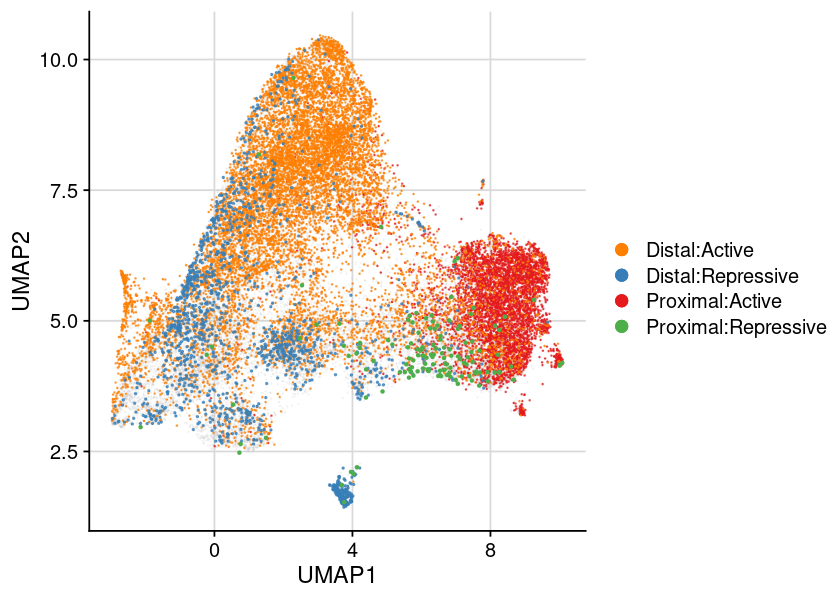

In [18]:
### get tables
dat = dat_region_merge
lst = split(dat, dat$Group)
dat = dat_region_umap

### set plot order and parameters
vec_txt_group = rev(c("Proximal:Repressive", "Distal:Repressive", "Distal:Active", "Proximal:Active"))
vec_num_size  = c(
    "Proximal:Repressive" = 0.6,
    "Distal:Repressive"   = 0.3,
    "Distal:Active"       = 0.1,
    "Proximal:Active"     = 0.1
)
vec_num_alpha = c(
    "Proximal:Repressive" = 1.0,
    "Distal:Repressive"   = 0.7,
    "Distal:Active"       = 0.6,
    "Proximal:Active"     = 0.6
)

### generate plot
gpt = ggplot() + 
    geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color="grey70",  size = 0.1, alpha = 0.1) +
    lapply(vec_txt_group, function(idx){
        geom_point(
            data  = lst[[idx]], aes(UMAP1, UMAP2, colour=Group),
            size  = vec_num_size[idx], 
            alpha = vec_num_alpha[idx], 
            show.legend = TRUE)
    }) +
    scale_colour_manual(name="", values=lst_txt_color) +
    theme_cowplot() +
    background_grid() +
    theme(legend.position = "right") +
    guides(
        colour = guide_legend(override.aes = list(size = 3)),
        #shape  = guide_legend(override.aes = list(size = 3))
    )

### assign and show
gpt_export_fcc_group_merge = gpt
options(repr.plot.height = 5, repr.plot.width = 7)
print(gpt)

**Save plot**

In [19]:
plt_export = gpt_export_fcc_group_merge
txt_export = "fig.region_umap.astarr_input_overlap.fcc_starrmpracrispr_vote2.scatterplot.label_starrmpra_vote2.merge"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 7, units = "in")